**Step 1: Defining all the imports**

In [ ]:
from PIL import Image
import io
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import ast 
import base64
import numpy as np
import os
%matplotlib inline

In [ ]:
df =pd.read_csv("finalData.csv")
df = df.drop("Unnamed: 0", axis=1)

***Function - Cosine Similarity Algorithm***

##### Link: 
https://www.google.com/search?q=cosine+similarity&rlz=1C1GCEU_enUS905US905&oq=cosine+&aqs=chrome.0.69i59l3j69i57j69i60l3.1488j0j7&sourceid=chrome&ie=UTF-8

In [ ]:
def cosineSim(a1,a2):
    a1  = ast.literal_eval(a1)
    a2  = ast.literal_eval(a2)
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

***The function 'stringToRGB' - It takes base64 image into an array of numbers***

In [ ]:
def stringToRGB(base64_string):
    imgdata = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(imgdata))
    return np.array(image)

*** This function compares 2 files or images and let u know the similarity between 2 images***

In [ ]:
def compute_Image(a1_file, a2_file):  
    
    a1_file  = a1_file.split("_")[1].split(".jpg")[0]
    a2_file  = a2_file.split("_")[1].split(".jpg")[0]
 
    a1_vector = df.iloc[int(a1_file)][1]
    a1_image  =  df.iloc[int(a1_file)][2]

    a2_vector = df.iloc[int(a2_file)][1]
    a2_image = df.iloc[int(a2_file)][2]
    
    ax[0].imshow(stringToRGB(a1_image))
    ax[1].imshow(stringToRGB(a2_image))
    
    sim = cosineSim(a1_vector,a2_vector)

    fig.suptitle('Cosine Similarity : {} '.format(sim))

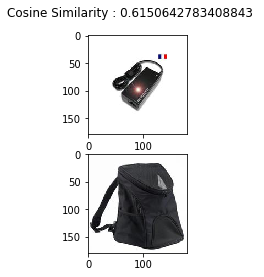

In [ ]:
fig, ax = plt.subplots(2)
compute_Image("1000000237_943.jpg", "1000000285_9422.jpg")